# Data Preprocessing

The images present in the dataset folder needs to be converted into tensors to feed them to a Convolutional Neural Network.
this code creates and stores the data and their labels in data.npy and labels.npy .

I have created a custom dataset for my model. The poular dataset can be found online.

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with_mask = os.listdir("dataset/with_mask")
without_mask = os.listdir("dataset/without_mask") 

In [3]:
with_mask1 = os.listdir("dataset/with_mask1")
without_mask1 = os.listdir("dataset/without_mask1") 

In [4]:
with_mask_imgs = []
img_size = (150,150)

for i in with_mask:
    img_path = os.path.join("dataset/with_mask", i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(img, img_size)
    with_mask_imgs.append(resized_img)
len(with_mask_imgs)

690

In [5]:
with_mask_imgs1 = []

for i in with_mask1:
    img_path = os.path.join("dataset/with_mask1", i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    with_mask_imgs1.append(img)
len(with_mask_imgs1)

291

In [6]:
without_mask_imgs = []
img_size = (150,150)

for i in without_mask:
    img_path = os.path.join("dataset/without_mask", i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(img, img_size)
    without_mask_imgs.append(resized_img)
len(without_mask_imgs)

7137

In [7]:
without_mask_imgs1 = []

for i in without_mask1:
    img_path = os.path.join("dataset/without_mask1", i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    without_mask_imgs1.append(img)
len(without_mask_imgs1)

359

In [19]:
final_with_mask_imgs = with_mask_imgs + with_mask_imgs1
final_without_mask_imgs = without_mask_imgs + without_mask_imgs1
print(len(final_with_mask_imgs))
print(len(final_without_mask_imgs))

981
7496


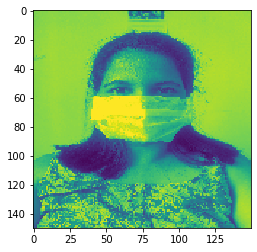

In [20]:
plt.imshow(final_with_mask_imgs[689])

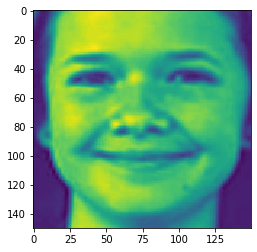

In [21]:
plt.imshow(final_without_mask_imgs[600])

In [22]:
with_mask_labels = [1 for i in range(len(final_with_mask_imgs))]
len(with_mask_labels)

981

In [23]:
without_mask_labels = [0 for i in range(len(final_without_mask_imgs))]
len(without_mask_labels)

7496

In [24]:
data = np.asarray(final_with_mask_imgs + final_without_mask_imgs)
data.shape

(8477, 150, 150)

In [25]:
labels = np.asarray(with_mask_labels + without_mask_labels)
labels.shape

(8477,)

In [26]:
data = np.reshape(data, (data.shape[0],data.shape[1],data.shape[2],1))
data.shape

(8477, 150, 150, 1)

In [27]:
from sklearn.utils import shuffle
data, labels = shuffle(data, labels)

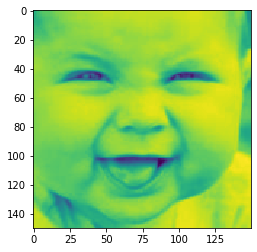

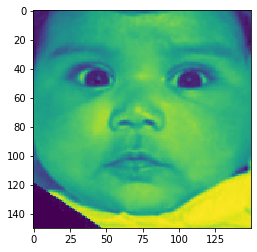

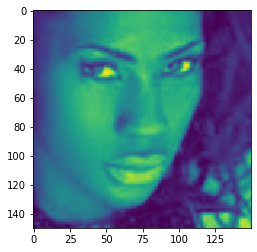

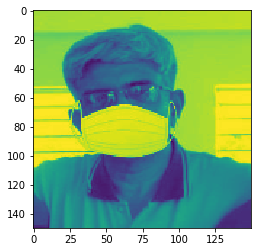

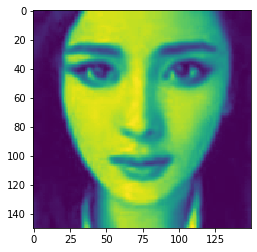

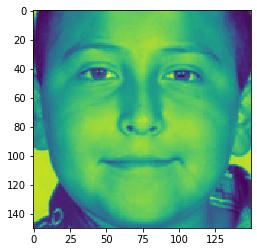

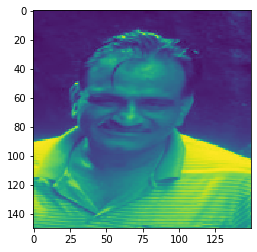

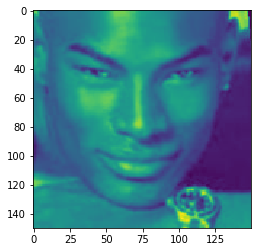

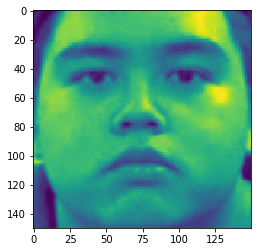

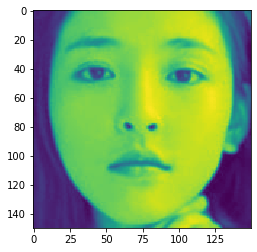

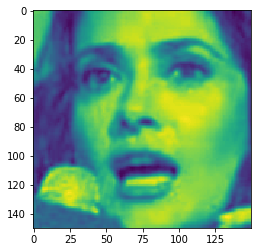

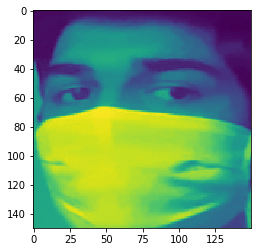

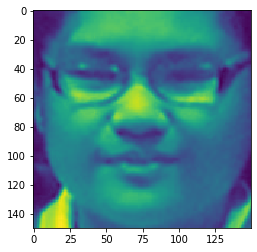

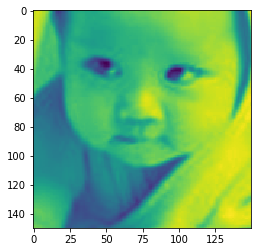

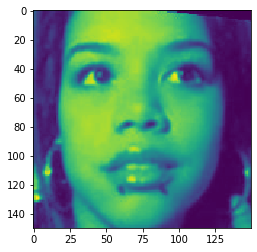

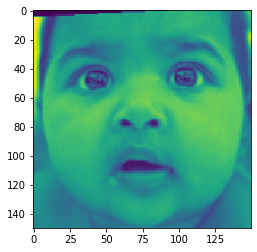

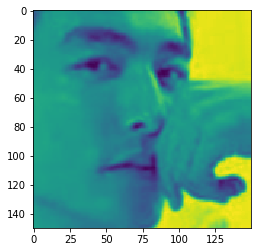

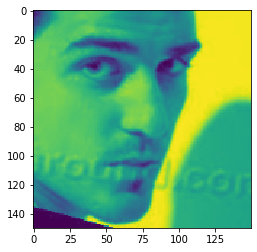

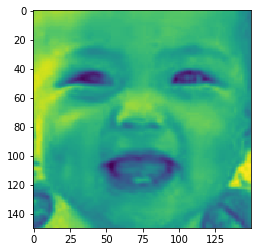

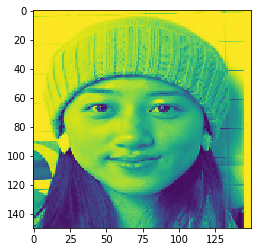

In [28]:
for i in range(10,30):
    plt.imshow(np.reshape(data[i], (150,150)))
    plt.show()

In [29]:
labels[10:30]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
np.save('data', data)
np.save('labels', labels)